In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cargamos los datos
df_encoded = pd.read_csv('df_tabla_minable.csv')

# Definimos características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['RENDIMIENTO BAJO_SI','RENDIMIENTO BAJO_NO','Estudiante'])  # Características
y = df_encoded['RENDIMIENTO BAJO_SI']  # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos y entrenamos el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [2]:
# Realizamos predicciones con el conjunto de prueba y tambien con el conjunto de entrenamiento
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluamos el modelo matris de confucion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))  # Para entrenamiento
print(confusion_matrix(y_test, y_test_pred))   # Para prueba

# Precisión, Recall y F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))  # Entrenamiento
print(classification_report(y_test, y_test_pred))    # Prueba

#Exactitud (Accuracy)
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

[[346   9]
 [ 18  72]]
[[131  22]
 [ 34   5]]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       355
        True       0.89      0.80      0.84        90

    accuracy                           0.94       445
   macro avg       0.92      0.89      0.90       445
weighted avg       0.94      0.94      0.94       445

              precision    recall  f1-score   support

       False       0.79      0.86      0.82       153
        True       0.19      0.13      0.15        39

    accuracy                           0.71       192
   macro avg       0.49      0.49      0.49       192
weighted avg       0.67      0.71      0.69       192

Train Accuracy: 0.9393258426966292
Test Accuracy: 0.7083333333333334


In [3]:
# Ajustamos del desbalance de las clases 
from sklearn.ensemble import RandomForestClassifier

# Creamos el modelo con pesos balanceados
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight='balanced'  # Manejo del desbalance
)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [4]:
# Evaluamos el modelo matris de confucion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))  # Para entrenamiento
print(confusion_matrix(y_test, y_test_pred))   # Para prueba

# Precisión, Recall y F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))  # Entrenamiento
print(classification_report(y_test, y_test_pred))    # Prueba

#Exactitud (Accuracy)
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

[[273  82]
 [ 19  71]]
[[111  42]
 [ 24  15]]
              precision    recall  f1-score   support

       False       0.93      0.77      0.84       355
        True       0.46      0.79      0.58        90

    accuracy                           0.77       445
   macro avg       0.70      0.78      0.71       445
weighted avg       0.84      0.77      0.79       445

              precision    recall  f1-score   support

       False       0.82      0.73      0.77       153
        True       0.26      0.38      0.31        39

    accuracy                           0.66       192
   macro avg       0.54      0.56      0.54       192
weighted avg       0.71      0.66      0.68       192

Train Accuracy: 0.7730337078651686
Test Accuracy: 0.65625


In [5]:
# Realizamos el balanceo de clases usando la libreria Smote
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [6]:
# Evaluamos el modelo matris de confucion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))  # Para entrenamiento
print(confusion_matrix(y_test, y_test_pred))   # Para prueba

# Precisión, Recall y F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))  # Entrenamiento
print(classification_report(y_test, y_test_pred))    # Prueba

#Exactitud (Accuracy)
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

[[283  72]
 [ 28  62]]
[[119  34]
 [ 25  14]]
              precision    recall  f1-score   support

       False       0.91      0.80      0.85       355
        True       0.46      0.69      0.55        90

    accuracy                           0.78       445
   macro avg       0.69      0.74      0.70       445
weighted avg       0.82      0.78      0.79       445

              precision    recall  f1-score   support

       False       0.83      0.78      0.80       153
        True       0.29      0.36      0.32        39

    accuracy                           0.69       192
   macro avg       0.56      0.57      0.56       192
weighted avg       0.72      0.69      0.70       192

Train Accuracy: 0.7752808988764045
Test Accuracy: 0.6927083333333334


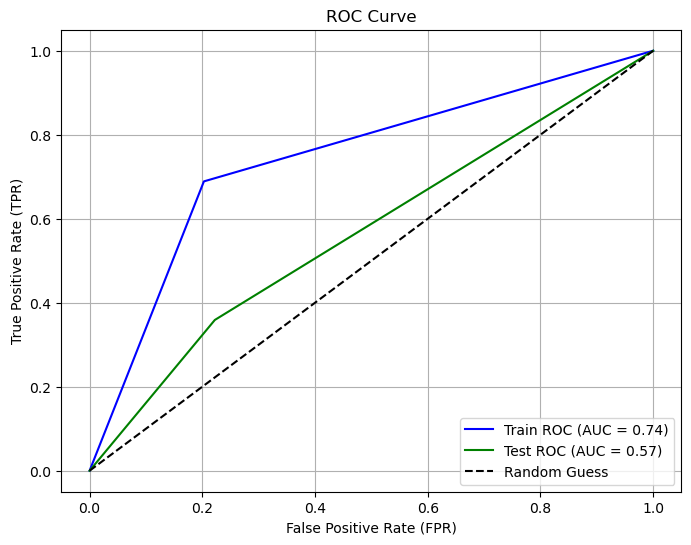

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Supongamos que ya tienes estas predicciones binarias:
# y_train_pred, y_test_pred son las predicciones binarias basadas en un umbral de 0.5

# Obtén las probabilidades para la clase positiva
y_train_prob = model.predict(X_train)  # Probabilidades para el conjunto de entrenamiento
y_test_prob = model.predict(X_test)   # Probabilidades para el conjunto de prueba

# Calcula las métricas ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calcula el área bajo la curva (AUC)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Línea de referencia
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()
